A Random Forest model, evaluated it with ROC–AUC and Precision–Recall, and improved recall by tuning the decision threshold.

In [2]:
import pandas as pd

url = "https://datascienceuwl.github.io/Project2018/loans50k.csv"
df = pd.read_csv(url, encoding="latin1")


In [3]:
df.shape

(50000, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       50000 non-null  int64  
 1   amount       49999 non-null  float64
 2   term         49999 non-null  object 
 3   rate         49999 non-null  float64
 4   payment      49999 non-null  float64
 5   grade        49999 non-null  object 
 6   employment   47215 non-null  object 
 7   length       47319 non-null  object 
 8   home         49999 non-null  object 
 9   income       49999 non-null  float64
 10  verified     49999 non-null  object 
 11  status       49999 non-null  object 
 12  reason       49999 non-null  object 
 13  state        49999 non-null  object 
 14  debtIncRat   49999 non-null  float64
 15  delinq2yr    49999 non-null  float64
 16  inq6mth      49999 non-null  float64
 17  openAcc      49999 non-null  float64
 18  pubRec       49999 non-null  float64
 19  revo

In [5]:
df.columns

Index(['loanID', 'amount', 'term', 'rate', 'payment', 'grade', 'employment',
       'length', 'home', 'income', 'verified', 'status', 'reason', 'state',
       'debtIncRat', 'delinq2yr', 'inq6mth', 'openAcc', 'pubRec', 'revolRatio',
       'totalAcc', 'totalPaid', 'totalBal', 'totalRevLim', 'accOpen24',
       'avgBal', 'bcOpen', 'bcRatio', 'totalLim', 'totalRevBal', 'totalBcLim',
       'totalIlLim'],
      dtype='object')

In [6]:
df['status'].value_counts()

,count
status,
Fully Paid,27074
Current,14532
Charged Off,7579
Late (31-120 days),449
In Grace Period,261
Late (16-30 days),102
Default,2


In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
employment,2785
length,2681
bcRatio,521
bcOpen,489
revolRatio,19
grade,1
amount,1
term,1
reason,1
income,1


In [8]:
df.describe()

,loanID,amount,rate,payment,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
count,50000.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,...,4.999900e+04,4.999900e+04,49999.000000,49999.000000,49511.000000,49479.000000,4.999900e+04,4.999900e+04,49999.000000,4.999900e+04
mean,327093.454600,15145.527911,0.130407,442.737519,7.617379e+04,18.731157,0.346167,0.639553,11.849217,0.232925,...,1.397782e+05,3.243594e+04,4.557831,13189.526651,9154.930945,63.188468,1.718866e+05,5.088178e+04,21190.290466,4.244567e+04
std,189495.851384,8527.772776,0.044192,244.835744,6.523503e+04,8.444506,0.907636,0.938869,5.524801,0.624342,...,1.526384e+05,3.269753e+04,3.079680,15561.787118,14296.865563,27.205695,1.697017e+05,4.731099e+04,21250.776922,4.329564e+04
min,16.000000,1000.000000,0.050000,30.540000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000e+02,0.000000e+00,0.000000,0.000000e+00
25%,163310.250000,8500.000000,0.100000,265.840000,4.623850e+04,12.390000,0.000000,0.000000,8.000000,0.000000,...,3.061900e+04,1.400000e+04,2.000000,3170.000000,1235.000000,43.100000,5.000100e+04,2.211000e+04,7500.000000,1.500000e+04
50%,324662.500000,13800.000000,0.130000,385.790000,6.500000e+04,18.210000,0.000000,0.000000,11.000000,0.000000,...,8.107300e+04,2.400000e+04,4.000000,7356.000000,4052.000000,67.100000,1.120710e+05,3.862600e+04,14700.000000,3.200000e+04
75%,491706.250000,20000.000000,0.160000,578.680000,9.000000e+04,24.730000,0.000000,1.000000,15.000000,0.000000,...,2.094385e+05,4.030000e+04,6.000000,18223.500000,10868.500000,87.000000,2.498060e+05,6.390300e+04,27600.000000,5.679400e+04
max,656728.000000,35000.000000,0.290000,1407.010000,7.446395e+06,61.210000,15.000000,6.000000,76.000000,28.000000,...,2.552960e+06,1.060800e+06,50.000000,358652.000000,373005.000000,161.000000,2.711061e+06,1.094819e+06,560800.000000,1.027358e+06


In [9]:
df['grade'].value_counts()

,count
grade,
C,14137
B,13755
A,8203
D,8186
E,4200
F,1240
G,278


In [10]:
df['term'].value_counts()

,count
term,
36 months,33753
60 months,16246


In [11]:
df['home'].value_counts()

,count
home,
MORTGAGE,25067
RENT,19684
OWN,5248


In [12]:
df['reason'].value_counts()

,count
reason,
debt_consolidation,29946
credit_card,11902
home_improvement,2937
other,2226
major_purchase,907
medical,502
small_business,436
car,379
moving,288


In [13]:
df['state'].value_counts()

,count
state,
CA,6842
NY,4121
TX,4081
FL,3366
IL,2035
NJ,1819
PA,1786
OH,1725
GA,1643


In [14]:
df[['amount','rate','payment','income','debtIncRat']].corr()

,amount,rate,payment,income,debtIncRat
amount,1.000000,0.129183,0.942782,0.341976,0.022406
rate,0.129183,1.000000,0.113586,-0.091823,0.174466
payment,0.942782,0.113586,1.000000,0.335742,0.006358
income,0.341976,-0.091823,0.335742,1.000000,-0.194221
debtIncRat,0.022406,0.174466,0.006358,-0.194221,1.000000


In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['loanID', 'amount', 'rate', 'payment', 'income', 'debtIncRat',
        'delinq2yr', 'inq6mth', 'openAcc', 'pubRec', 'revolRatio', 'totalAcc',
        'totalPaid', 'totalBal', 'totalRevLim', 'accOpen24', 'avgBal', 'bcOpen',
        'bcRatio', 'totalLim', 'totalRevBal', 'totalBcLim', 'totalIlLim'],
       dtype='object'),
 Index(['term', 'grade', 'employment', 'length', 'home', 'verified', 'status',
        'reason', 'state'],
       dtype='object'))

In [16]:
df['loan_default'] = df['status'].str.lower().apply(
    lambda x: 0 if x == 'fully paid' else 1
)

In [17]:
df['loan_default'].value_counts()

,count
loan_default,
0,27074
1,22926


In [18]:
df['status'].value_counts()

,count
status,
Fully Paid,27074
Current,14532
Charged Off,7579
Late (31-120 days),449
In Grace Period,261
Late (16-30 days),102
Default,2


In [19]:
df.drop(
    columns=['loanID', 'status', 'totalPaid', 'payment'],
    inplace=True
)
# These features either uniquely identify records or contain post-loan information that would not be available at prediction time.
# Keeping them would introduce data leakage and inflate model performance unrealistically.

In [20]:
df.isnull().sum().sort_values(ascending=False)

,0
employment,2785
length,2681
bcRatio,521
bcOpen,489
revolRatio,19
grade,1
home,1
income,1
verified,1
reason,1


In [21]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols, cat_cols

(Index(['amount', 'rate', 'income', 'debtIncRat', 'delinq2yr', 'inq6mth',
        'openAcc', 'pubRec', 'revolRatio', 'totalAcc', 'totalBal',
        'totalRevLim', 'accOpen24', 'avgBal', 'bcOpen', 'bcRatio', 'totalLim',
        'totalRevBal', 'totalBcLim', 'totalIlLim', 'loan_default'],
       dtype='object'),
 Index(['term', 'grade', 'employment', 'length', 'home', 'verified', 'reason',
        'state'],
       dtype='object'))

In [22]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-4074283006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [23]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1925696021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [24]:
df.isnull().sum()

,0
amount,0
term,0
rate,0
grade,0
employment,0
length,0
home,0
income,0
verified,0
reason,0


In [25]:
#term, grade, employment, length, home, verified, reason, state these columns are categorical. we need to perform one hot encoding on them but we wont perform it on reason
#and state columns as they have to many different categories which will lead to a lot more columns making the dataset insanely huge.
df.drop(columns=['state', 'reason'], inplace=True) #instead we drop them as they r not very crucial in making this decision.

In [26]:
df = pd.get_dummies(
    df, columns=['term', 'grade', 'employment', 'length', 'home', 'verified'],
    drop_first=True
)

In [27]:
df.head()

,amount,rate,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,...,length_5 years,length_6 years,length_7 years,length_8 years,length_9 years,length_< 1 year,home_OWN,home_RENT,verified_Source Verified,verified_Verified
0,8000.0,0.14,49966.0,30.05,0.0,0.0,11.0,0.0,0.55,15.0,...,False,False,False,False,False,False,False,True,True,False
1,11000.0,0.10,50000.0,8.74,0.0,2.0,12.0,0.0,0.36,15.0,...,False,False,False,False,False,False,False,False,False,False
2,35000.0,0.15,360000.0,14.50,0.0,1.0,8.0,0.0,0.83,14.0,...,False,False,False,False,False,False,False,True,False,True
3,20000.0,0.12,60000.0,14.14,0.0,0.0,12.0,3.0,0.01,48.0,...,False,False,False,False,False,False,False,False,True,False
4,12000.0,0.12,64000.0,5.14,0.0,0.0,8.0,0.0,0.58,22.0,...,False,False,False,False,False,False,False,False,True,False


In [28]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [29]:
X = df.drop('loan_default', axis=1)
y = df['loan_default']

X.shape, y.value_counts()

((50000, 21440),
 loan_default
 0    27074
 1    22926
 Name: count, dtype: int64)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y) #stratify=y → keeps class balance

In [31]:
df.drop(columns=[
    'totalBal',
    'totalRevBal',
    'avgBal'
], inplace=True) #These are highly correlated balance variables. Removing them reduces memory and multicollinearity. We did this because session crashed because of too much data.

In [32]:
df_sample = df.sample(n=15000, random_state=42)

In [33]:
X = df_sample.drop('loan_default', axis=1)
y = df_sample['loan_default']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [35]:
df.drop(columns=[
    'totalBcLim',
    'totalIlLim',
    'totalLim',
    'totalRevLim',
], inplace=True)

In [36]:
df_sample = df.sample(n=10000, random_state=42)

In [37]:
X = df_sample.drop('loan_default', axis=1)
y = df_sample['loan_default']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=500,
    solver='liblinear'
)

lr.fit(X_train, y_train)

# Logistic Regression does not have a closed-form solution. So it uses numerical optimization algorithms called solvers to find the best weights.
# Solver: “The method used to minimize the loss function.”

# Liblinear is a solver Optimized for: Binary classification - Medium-sized datasets - High-dimensional but not extremely sparse data

# Saga: A stochastic gradient descent–based solver - Designed for: Very large datasets - Sparse matrices

LogisticRegression(max_iter=500, solver='liblinear')

| Situation                     | Solver      |
| ----------------------------- | ----------- |
| Quick baseline, binary target | `liblinear` |
| Many features, limited RAM    | `liblinear` |
| Large sparse data, L1 penalty | `saga`      |
| ElasticNet regularization     | `saga`      |
| Production-scale optimization | `saga`      |


In [40]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66      1360
           1       0.57      0.43      0.49      1140

    accuracy                           0.59      2500
   macro avg       0.59      0.58      0.58      2500
weighted avg       0.59      0.59      0.58      2500



In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [42]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1360
           1       0.65      0.47      0.55      1140

    accuracy                           0.64      2500
   macro avg       0.65      0.63      0.63      2500
weighted avg       0.65      0.64      0.63      2500



In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf)

array([[1074,  286],
       [ 602,  538]])

In this model:
Random Forest:

Captures non-linear patterns

Better than random guessing

Still biased toward predicting non-default

Logistic Regression:

Likely more conservative

Even lower recall for defaults in many cases

In [44]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

,0
debtIncRat,0.056495
bcOpen,0.051925
amount,0.051552
bcRatio,0.050643
revolRatio,0.050157
income,0.048834
totalAcc,0.047040
openAcc,0.042570
rate,0.041064
accOpen24,0.038361


In [45]:
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight = {0:1, 1:2}
)

rf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, n_estimators=200, n_jobs=-1,
                       random_state=42)

Class_weight = {0:1, 1:2} means:   
Class 0 (Non-default): model says risky but person pays.
-> Normal importance

Class 1 (Default):
-> Twice as important because if model says safe and person defaults there will be a hug loss.

So you’re telling the model:

-> “Hey model, if you miss a defaulter, I’ll be 2× more angry than if you wrongly reject a good borrower.”  
--> Class weights allow us to penalize misclassification of defaulters more heavily, improving recall for risky borrowers.

In [46]:
y_pred_balanced = rf_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.63      0.77      0.70      1360
           1       0.63      0.47      0.54      1140

    accuracy                           0.63      2500
   macro avg       0.63      0.62      0.62      2500
weighted avg       0.63      0.63      0.62      2500



In [47]:
confusion_matrix(y_test, y_pred_balanced)

array([[1050,  310],
       [ 607,  533]])

Recall certainly didnt improve even after using class_weight. we will now decrease the threshold from 0.5 to 0.4(threshold tuning).

In [48]:
import numpy as np

y_prob = rf.predict_proba(X_test)[:, 1]  # Getting probabilities for class 1 (default)
y_pred_thresh = (y_prob>=0.4).astype(int)

print(classification_report(y_test, y_pred_thresh), confusion_matrix(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58      1360
           1       0.55      0.72      0.62      1140

    accuracy                           0.60      2500
   macro avg       0.62      0.61      0.60      2500
weighted avg       0.62      0.60      0.60      2500
 [[693 667]
 [323 817]]


Recall increased to 72% from 47%, accuracy and precision surely declined but it is fine since avoiding defaulter is more important for banking systems.

ROC–AUC measures how well the model separates defaulters from non-defaulters

Value ranges from 0 to 1

0.5 → random guessing

0.7 → decent

0.8 → very good

0.9+ → excellent

It is threshold-independent.

ROC AUC Score:  0.6695972007223941


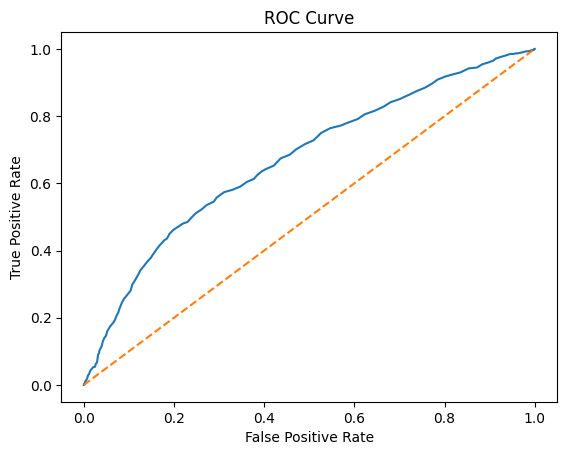

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score: ", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle =  '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

average precision score:  0.6152633446890755


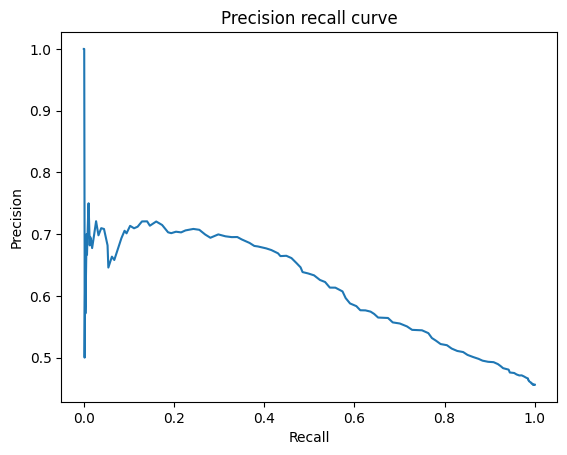

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

avg_pr = average_precision_score(y_test, y_prob)
print("average precision score: ", avg_pr)

plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision recall curve")
plt.show()

In [51]:
import joblib

joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']